In [1]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file = pd.read_excel("segment.xlsx", sheetname=0)
file.columns = ["offer_id", "campaign", "varietal", "min_qty", "discount", "origin", "past_peak"]
file.head()

C:\Users\pradd\Anaconda3\lib\site-packages\pandas\io\excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


,offer_id,campaign,varietal,min_qty,discount,origin,past_peak
0,1,January,Malbec,72,56,France,False
1,2,January,Pinot Noir,72,17,France,False
2,3,February,Espumante,144,32,Oregon,True
3,4,February,Champagne,72,48,France,True
4,5,February,Cabernet Sauvignon,144,44,New Zealand,True


In [3]:
file1 = pd.read_excel("segment.xlsx", sheetname=1)
file1.columns = ["customer_name", "offer_id"]
file1['n'] = 1
file1.head()

C:\Users\pradd\Anaconda3\lib\site-packages\pandas\io\excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


,customer_name,offer_id,n
0,Smith,2,1
1,Smith,24,1
2,Johnson,17,1
3,Johnson,24,1
4,Johnson,26,1


In [4]:
file2 = file1.merge(file, left_on='offer_id', right_on='offer_id', how='left')
file2.head()

,customer_name,offer_id,n,campaign,varietal,min_qty,discount,origin,past_peak
0,Smith,2,1,January,Pinot Noir,72,17,France,False
1,Smith,24,1,September,Pinot Noir,6,34,Italy,False
2,Johnson,17,1,July,Pinot Noir,12,47,Germany,False
3,Johnson,24,1,September,Pinot Noir,6,34,Italy,False
4,Johnson,26,1,October,Pinot Noir,144,83,Australia,False


In [5]:
index = pd.pivot_table(file2, values='n', index='customer_name', columns='offer_id')
index = index.fillna(0).reset_index()
index.head()

offer_id,customer_name,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,Adams,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,Allen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Anderson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bailey,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,Baker,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [6]:
import numpy as np
from sklearn.cluster import KMeans

x_cols = index.drop(['customer_name'],axis=1)
ss=[]
for k in range(1,15):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(x_cols)
    ss.append(kmeans.inertia_)

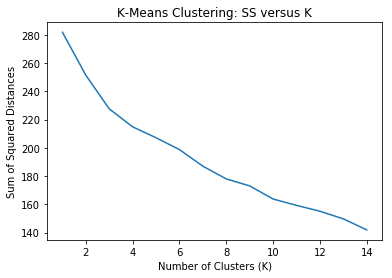

In [7]:
plt.plot(range(1,15),ss)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances')
plt.title('K-Means Clustering: SS versus K')
plt.show()

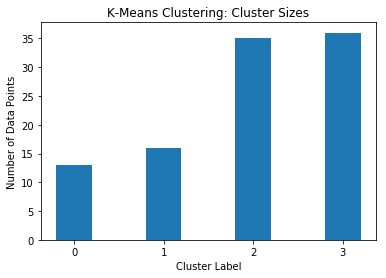

In [8]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(x_cols)
index['cluster'] = kmeans.predict(x_cols)


unique, counts = np.unique(kmeans.labels_, return_counts=True)
plt.bar(unique, counts, align = 'center', width=0.4)
plt.xticks([0,1,2,3])
plt.xlabel('Cluster Label')
plt.ylabel('Number of Data Points')
plt.title('K-Means Clustering: Cluster Sizes')
plt.show()

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=0)
index['x'] = pca.fit_transform(x_cols)[:,0]
index['y']= pca.fit_transform(x_cols)[:,1]

index.head()

offer_id,customer_name,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,cluster,x,y
0,Adams,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2,1.007580,0.108215
1,Allen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,-0.287539,0.044715
2,Anderson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,-0.392032,1.038391
3,Bailey,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,0.699477,-0.022542
4,Baker,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3,0.088183,-0.471695


In [21]:
cluster= index['cluster'].values
features = index.iloc[:,[-2,-1]].values

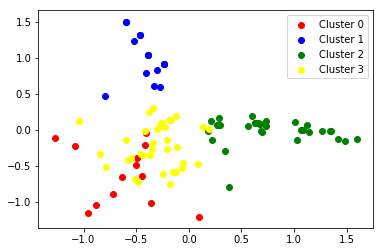

In [23]:
color=['red','blue','green','yellow']
plt.scatter(features[cluster==0,0], features[cluster==0,1], c=color[0], label='Cluster 0')
plt.scatter(features[cluster==1,0], features[cluster==1,1], c=color[1], label='Cluster 1')
plt.scatter(features[cluster==2,0], features[cluster==2,1], c=color[2], label='Cluster 2')
plt.scatter(features[cluster==3,0], features[cluster==3,1], c=color[3], label='Cluster 3')
plt.legend() 
plt.show()